In [1]:
##importing packages
import pandas as pd
import numpy as np
import json
import progressbar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:

!pip install progressbar

In [3]:
# read in the json files
portfolio = pd.read_json('C:\\Users\\Drumil Patel\\Desktop\\Capstone\\portfolio.json', orient='records', lines=True)
profile = pd.read_json('C:\\Users\\Drumil Patel\\Desktop\\Capstone\\profile.json', orient='records', lines=True)
transcript = pd.read_json('C:\\Users\\Drumil Patel\\Desktop\\Capstone\\transcript.json', orient='records', lines=True)

In [4]:
file_name = 'portfolio.csv'
  
# saving the excel
portfolio.to_csv(file_name)

In [5]:
file_name = 'profile.csv'
  
# saving the excel
profile.to_csv(file_name)

In [6]:
file_name = 'transcript.csv'
  
# saving the excel
transcript.to_csv(file_name)

# cleaning Portfolio dataset

#### Portfolio dataset contains information like reward, channels(email,web,mobile), offer_type and duration.

In [7]:
portfolio = pd.read_csv('C:\\Users\\Drumil Patel\\Desktop\\Capstone\\portfolio.csv')

In [8]:
portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [9]:
portfolio.duration.unique()

array([ 7,  5,  4, 10,  3], dtype=int64)

In [10]:
portfolio.reward.unique()

array([10,  0,  5,  3,  2], dtype=int64)

In [11]:
portfolio.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [12]:
portfolio.difficulty.unique()

array([10,  0,  5, 20,  7], dtype=int64)

In [13]:
# here we are renaming column id to offer_id for better understanding.

portfolio.rename(columns={'id': 'offer_id'}, inplace=True)

In [14]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   offer_id    10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [15]:
del portfolio['Unnamed: 0']
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [16]:
#here we are checking duplicate value present or not 

portfolio.duplicated().sum()

0

In [17]:
#Checking any null value present or not

portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
offer_id      0
dtype: int64

# cleaning Profile dataset

In [18]:
profile = pd.read_csv('C:\\Users\\Drumil Patel\\Desktop\\Capstone\\profile.csv')

In [19]:
profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [20]:
del profile['Unnamed: 0']

In [21]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [22]:
# checking duolicate records

profile.duplicated().sum()

0

In [23]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [24]:
# we are dropping null values present in columns
profile = profile.dropna()

In [25]:
#Here we are printing every every records with the unique age.
profile.age.unique()

array([ 55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,  78,
        42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,  54,
        39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,  27,
        73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,  83,
        43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,  25,
        37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,  93,
        91,  92,  98, 101,  97,  99], dtype=int64)

In [26]:
#Here we are checking unique values in gender columns.
#There are Male, Female, null values and some values with O

profile.gender.unique()

array(['F', 'M', 'O'], dtype=object)

In [27]:
profile.loc[profile['gender'] == 'O', 'gender'] = np.nan

In [28]:
# we are dropping null values present in gender columns
profile = profile.dropna(subset=['gender'])

In [29]:
# Here we are using lambda function to convert the Gender.
# HEre we are putting 1 for Male and 0 for female.

profile['gender'] = profile['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [30]:
# Here we are making became_member_on column more readable. 
# as we need year and month for the Analysis, so we are converting into proper readable formate.
# we are using %Y%m%d format

profile.became_member_on = profile['became_member_on'].astype(str).astype('datetime64[ns]', format("%Y%m%d"))

In [31]:
# Here we are adding new column in our dataframe profile
# we are adding start_year and start_month column

profile['start_year'] = profile.became_member_on.dt.year
profile["start_month"] = profile.became_member_on.dt.month

In [32]:
# profile: rename id col name customer_id.

profile.rename(columns={'id': 'customer_id'}, inplace=True)

In [33]:
profile.head()

,gender,age,customer_id,became_member_on,income,start_year,start_month
1,0,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,0,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,1,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,1,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,1,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11


# cleaning transcript dataset

In [34]:
transcript = pd.read_csv('C:\\Users\\Drumil Patel\\Desktop\\Capstone\\transcript.csv')

In [35]:
transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [36]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [37]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [38]:
# rename person column  to customer_id.
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [39]:
# rename value columns to offer_id.
transcript.rename(columns={'value': 'offer_id'}, inplace=True)

In [40]:
#creating the new column named amount 
transcript['amount'] = 0
# change amount column type to float
transcript.amount.astype('float')
#extracting amount from offer id
transcript['amount'] = transcript.offer_id.str.extract('(\d+\.\d+)')

In [41]:
# transcript: drop transaction rows whose customer_id is not in profile:customer_id
transcript = transcript[transcript.customer_id.isin(profile.customer_id)]

In [42]:
# convert time into 24 hours format
transcript['time'] /= 24.0

In [43]:
# drop the duplicated value, and reset the index
transcript.drop_duplicates(inplace=True)

transcript.reset_index(drop=True, inplace=True)

In [44]:
# transcript: segregate  offer and transaction data 

# extract transactions from transcript data
transaction_df = transcript[transcript.event=='transaction'].copy()
transaction_df.drop(columns=['event','Unnamed: 0'], inplace=True)
transaction_df

,customer_id,offer_id,time,amount
10865,02c083884c7d45b39cc68e1314fec56c,{'amount': 0.8300000000000001},0.00,0.8300000000000001
10868,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,{'amount': 34.56},0.00,34.56
10870,54890f68699049c2a04d415abc25e717,{'amount': 13.23},0.00,13.23
10878,b2f1cd155b864803ad8334cdf13c4bd2,{'amount': 19.51},0.00,19.51
10879,fe97aa22dd3e48c8b143116a8403dd52,{'amount': 18.97},0.00,18.97
...,...,...,...,...
268785,24f56b5e1849462093931b164eb803b5,{'amount': 22.64},29.75,22.64
268787,b3a1272bc9904337b331bf348c3e8c17,{'amount': 1.5899999999999999},29.75,1.5899999999999999
268788,68213b08d99a4ae1b0dcb72aebd9aa35,{'amount': 9.53},29.75,9.53
268789,a00058cf10334a308c68e7631c529907,{'amount': 3.61},29.75,3.61


In [45]:
# transcript:  separate offer and transaction data 

# extract offer-related from transcript data
offers_df = transcript[transcript.event!='transaction'].copy()

# one-hot encode offer event
offers_df['received'] = offers_df.event.apply(lambda x: 1 if x == 'offer received' else 0)
offers_df['completed'] = offers_df.event.apply(lambda x: 1 if x == 'offer completed' else 0)
offers_df['viewed'] = offers_df.event.apply(lambda x: 1 if x == 'offer viewed' else 0)


offers_df.drop(columns=['event', 'amount'], inplace=True)

In [46]:
transcript.event.value_counts()

transaction        122176
offer received      65585
offer viewed        49087
offer completed     31943
Name: event, dtype: int64

In [47]:
offers_df.viewed.sum(), offers_df.completed.sum(), offers_df.received.sum()

(49087, 31943, 65585)

In [48]:
offers_df.head()

,Unnamed: 0,customer_id,offer_id,time,received,completed,viewed
0,0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,1,0,0
1,2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,1,0,0
2,5,389bc3fa690240e798340f5a15918d5c,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0,1,0,0
3,7,2eeac8d8feae4a8cad5a6af0499a211d,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0,1,0,0
4,8,aa4862eba776480b8bb9c68455b8c2e1,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,1,0,0


# Here now we are merging all dataframe (offers_df, portfolio, profile, transcript)

In [49]:

def combine_data(profile, portfolio, offers_df, transaction_df):
    data = []
    customer_ids = offers_df['customer_id'].unique()
    
    widgets=[
        ' [', progressbar.Timer(), '] ',
        progressbar.Bar(),
        ' (', progressbar.ETA(), ') ',
    ]
    
    # loop through all customer ids in offers_df
    for ind in progressbar.progressbar(range(len(customer_ids)), widgets=widgets):
        
        # get customer id from the list
        cust_id = customer_ids[ind]
        
        # extract customer profile from profile data
        customer = profile[profile['customer_id']==cust_id]
        
        # extract offers associated with the customer from offers_df
        cust_offer_data = offers_df[offers_df['customer_id']==cust_id]
        
        # extract transactions associated with the customer from transactions_df
        cust_transaction_data = transaction_df[transaction_df['customer_id']==cust_id]
        
        # extract received, completed, viewed offer data from customer offers
        offer_received_data = cust_offer_data[cust_offer_data['received'] == 1]
        offer_completed_data = cust_offer_data[cust_offer_data['completed'] == 1]
        offer_viewed_data = cust_offer_data[cust_offer_data['viewed'] == 1]
        rows = []
        # loop through each received offer
        for i in range(offer_received_data.shape[0]):
        
            # fetch an offer id 
            offer_id = offer_received_data.iloc[i]['offer_id']
            
            # extract offer row from portfolio
            offer_row = portfolio
            
            
            # extract duration days of an offer from offer row
            duration_days = offer_row['duration'].values[0]
            
            # initialize start and end time of an offer
            start_time = offer_received_data.iloc[i]['time']
            end_time = start_time + duration_days
        
            # seggregate offers completed within end date
            off_completed_withintime = np.logical_and(
                offer_completed_data['time'] >= start_time, offer_completed_data['time'] <= end_time)
            
            # seggregate offers viewed within end date
            off_viewed_withintime = np.logical_and(
                offer_viewed_data['time'] >= start_time, offer_viewed_data['time'] <=end_time)

            # flag offer_successful to 1 if an offer is viewed and completed within end time else to 0
            offer_successful = off_completed_withintime.sum() > 0 and off_viewed_withintime.sum() > 0
            
            # extract transactions occured within time
            transaction_withintime = np.logical_and(
                cust_transaction_data['time'] >= start_time, cust_transaction_data['time'] <= end_time)
        
            transaction_data = cust_transaction_data[transaction_withintime]
            
            # total amount spent by a customer from given offers
            transaction_total_amount = transcript['amount']
            
            row = {
                #'offer_id': offer_id,
                'customer_id': cust_id,
                'time': start_time,
                'total_amount': transaction_total_amount,
                'offer_successful': int(offer_successful),
            }
                
            row.update(offer_row.iloc[0,0:].to_dict())

            row.update(customer.iloc[0,:].to_dict())

            rows.append(row)
        
        data.extend(rows)
    
    data = pd.DataFrame(data)
    return data

In [50]:
data = combine_data(profile, portfolio, offers_df, transaction_df)

 [Elapsed Time: 0:06:27] |##################################| (Time:  0:06:27) 


In [51]:
data.to_csv('master_offer_analysis.csv', index=False)

# visualization

In [52]:
clean_dataframe = pd.read_csv('master_offer_analysis.csv')

In [53]:
clean_dataframe.head()

,customer_id,time,total_amount,offer_successful,reward,channels,difficulty,duration,offer_type,offer_id,gender,age,became_member_on,income,start_year,start_month
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,0 NaN\n1 ...,1,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,75,2017-05-09,100000.0,2017,5
1,78afa995795e4d85b5d9ceeca43f5fef,7.0,0 NaN\n1 ...,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,75,2017-05-09,100000.0,2017,5
2,78afa995795e4d85b5d9ceeca43f5fef,17.0,0 NaN\n1 ...,1,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,75,2017-05-09,100000.0,2017,5
3,78afa995795e4d85b5d9ceeca43f5fef,21.0,0 NaN\n1 ...,1,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,75,2017-05-09,100000.0,2017,5
4,e2127556f4f64592b11af22de27a7932,0.0,0 NaN\n1 ...,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,68,2018-04-26,70000.0,2018,4


In [54]:
X = clean_dataframe['gender']
y = clean_dataframe['start_year']

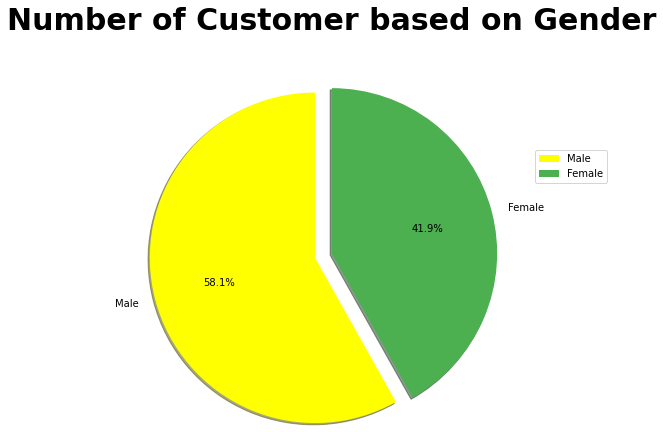

In [55]:
#getting counts of Men and Women

mylabels = ["Male", "Female"]
mycolors = ["yellow", "#4CAF50"]
Gender_count = clean_dataframe.gender.value_counts() 
plt.pie(Gender_count.values, 
        labels = mylabels, 
        autopct='%1.1f%%',
        radius=1.9, 
        explode = [0.2,0], 
        shadow = True, 
        startangle = 90,
        colors = mycolors)

plt.legend(mylabels, loc = "upper center", bbox_to_anchor=(1.60, 1), ncol=1)
plt.title('Number of Customer based on Gender', y = 1.5, fontsize = 30.0, fontweight='bold')
plt.show()

From above pie chart, we can say that mostly people comming in startbucks are men. However the difference between men and women is not huge.

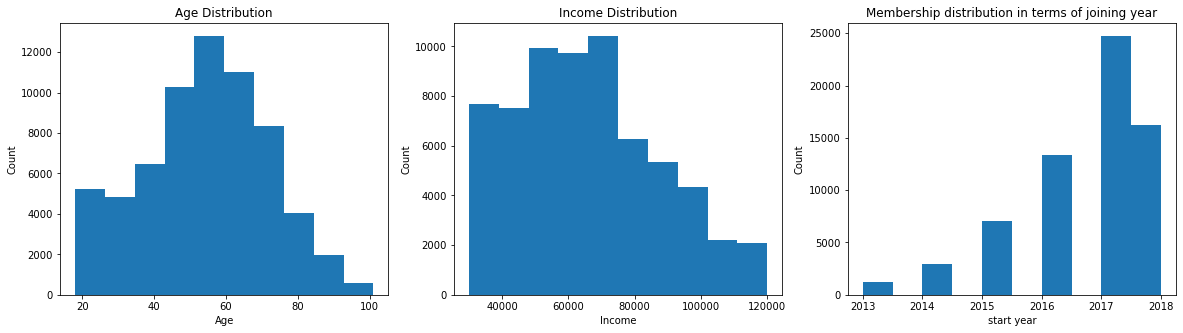

In [56]:
# to be able to draw three subplots in a row
fig, ax = plt.subplots(figsize=(20, 5), nrows=1, ncols=3)

# plot a age distribution in data
plt.sca(ax[0])
plt.hist(clean_dataframe['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# plot a income distribution in data
plt.sca(ax[1])
plt.hist(clean_dataframe['income'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution');

# plot a start_year distribution
plt.sca(ax[2])
plt.hist(clean_dataframe['start_year'])
plt.xlabel('start year')
plt.ylabel('Count')
plt.title('Membership distribution in terms of joining year');


 * From the Age distribution plot we can say that highest group of people comming in startbuck were belongs to age group of 40 to 70. 
 * Income distribution graph shows that the number of customers whose average salary is less than 70K were comming in starbucks often compare to others. The reason behind this maybe this people have less salary are belongs to group 25 to 45.
 * Membership distribution has interesting results - 2017 has the highest registered customers than any starting from 2013. The plot also shows that there is an increasing trend in the number of registrations except for 2018.

# Income distribution as a function a gender

Text(0.5, 1.0, 'Female Customer Income')

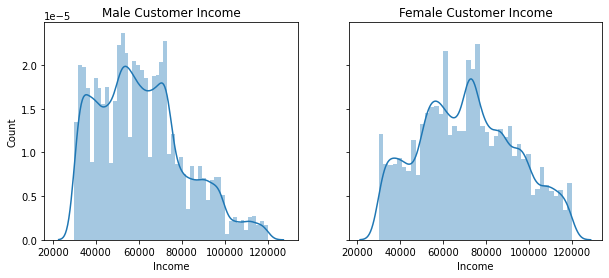

In [57]:
# extract male and female customers
male_customers = clean_dataframe[clean_dataframe['gender'] == 1]
female_customers = clean_dataframe[clean_dataframe['gender'] == 0]

# to be able to draw two subplots in a row
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, sharex=True, sharey=True)

# plot a male customers income distribution
plt.sca(ax[0])
sns.distplot(male_customers['income'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Male Customer Income')

# plot a female customers income distribution
plt.sca(ax[1])
sns.distplot(female_customers['income'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Female Customer Income')

Plots conclude that minimum and maximum income for both male and female are approximately same but the count of male customers in low-income level is slightly higher than that of female customers

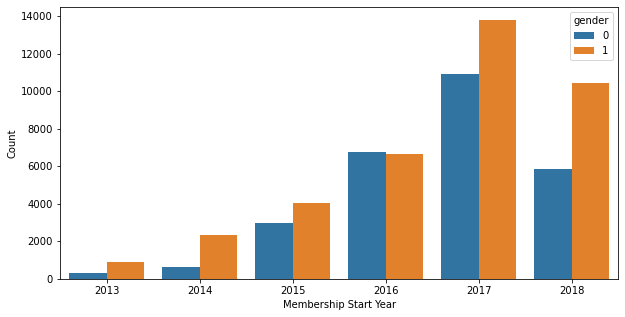

In [58]:
# groupby start_year and gender to plot a graph
membership_date  = clean_dataframe.groupby(['start_year', 'gender']).size()
membership_date = membership_date.reset_index()
membership_date.columns = ['start_year', 'gender', 'count']

# plot a bar graph for age distribution as a function of gender in membership program
plt.figure(figsize=(10, 5))
sns.barplot(x = 'start_year', y='count', hue='gender', data = membership_date)
plt.xlabel('Membership Start Year')
plt.ylabel('Count');

The results suggest that each and every year starbucks is getting new customer specially in 2017 and most customers joined the Starbucks rewards program in 2017 followed by 2018. Plots also depict that there are more male customers joining the program every year more than female customers.

# MODELS

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Baseline Random Forest Model

In [79]:
## data=pd.read_csv('master_offer_analysis_final.csv')

X=data[['age','gender','income','reward']]
y=data['offers']

### Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

Random_Regressor_model = RandomForestClassifier(n_estimators = 12,random_state = 4, max_depth = 5, n_jobs=-1)        
Random_Regressor_model.fit(X_train,y_train)
training_score = Random_Regressor_model.score(X_train, y_train)
print("Model score of Training data", training_score) 

testing_score = Random_Regressor_model.score(X_test, y_test)
print("Testing data:", testing_score) 

Model score of Training data 0.8995273899033297
Testing data: 0.8972482582326701


In [80]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
def evaluate(Random_Regressor_model):
    predicted = Random_Regressor_model.predict(X_test)
    report = classification_report(y_test, predicted)
    matrix = confusion_matrix(y_test, predicted)
    print(report)
    sns.heatmap(matrix, annot=True,fmt=".1f")

              precision    recall  f1-score   support

           1       0.80      1.00      0.89      8008
           2       1.00      1.00      1.00      4033
           3       1.00      0.74      0.85      7910

    accuracy                           0.90     19951
   macro avg       0.93      0.91      0.91     19951
weighted avg       0.92      0.90      0.90     19951



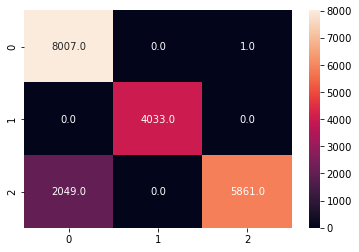

In [81]:
evaluate(Random_Regressor_model)

# K-Nearest Neighbors Model

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X=data[['age','gender','income','reward']]
y=data['offers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.8550448599067716


              precision    recall  f1-score   support

           1       0.81      0.88      0.84      8008
           2       0.98      0.94      0.96      4033
           3       0.84      0.79      0.81      7910

    accuracy                           0.86     19951
   macro avg       0.88      0.87      0.87     19951
weighted avg       0.86      0.86      0.86     19951



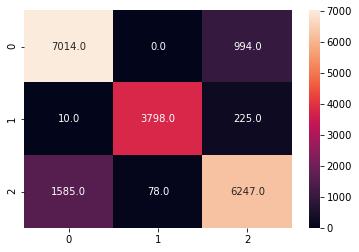

In [83]:
evaluate(knn)

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegressionCV
X=data[['age','gender','income','reward']]
y=data['offers']

### Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
Logistic_r = LogisticRegressionCV(random_state=10,cv=5)
Logistic_r.fit(X_train, y_train)
score = Logistic_r.score(X_train, y_train)
print("Model score Training of data", score) 

testing_score = Logistic_r.score(X_test, y_test)
print("Model score Testing data:", testing_score) 

Model score Training of data 0.8517481203007519
Model score Testing data: 0.8537703932035186


              precision    recall  f1-score   support

           1       0.82      0.81      0.81      5208
           2       1.00      1.00      1.00      2702
           3       0.82      0.83      0.82      5391

    accuracy                           0.85     13301
   macro avg       0.88      0.88      0.88     13301
weighted avg       0.85      0.85      0.85     13301



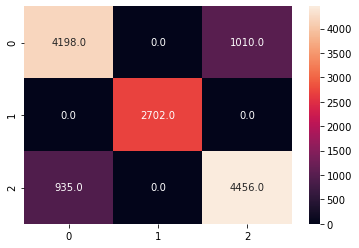

In [85]:
evaluate(Logistic_r)

# XGBoost Model

In [68]:
# installing xgboost
!pip install imblearn
!pip install xgboost

In [86]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
X=data[['age','gender','income','reward']]
y=data['offers']

### Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)
print(accuracy_score(y_test, y_predict))

[10:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8949426093930128


              precision    recall  f1-score   support

           1       0.80      0.97      0.88      7864
           2       1.00      1.00      1.00      4124
           3       0.96      0.77      0.85      7963

    accuracy                           0.89     19951
   macro avg       0.92      0.91      0.91     19951
weighted avg       0.91      0.89      0.89     19951



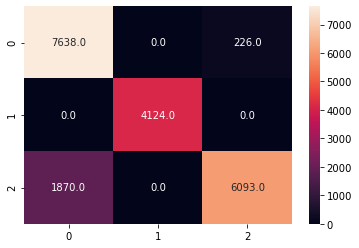

In [87]:
evaluate(xgb)

# Baseline Random Forest Model

In [88]:
X=data[['age','gender','income','reward','offers','duration','total_amount']]
y=data['offer_successful']

### Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
Random_Regressor_model2 = RandomForestClassifier(n_estimators = 1,random_state = 40, max_depth = 6, n_jobs=-1)        
Random_Regressor_model2.fit(X_train,y_train)
training_score = Random_Regressor_model2.score(X_train, y_train)
print("Model score of Training data", training_score) 

testing_score = Random_Regressor_model2.score(X_test, y_test)
print("Testing data:", testing_score) 


Model score of Training data 0.902749731471536
Testing data: 0.9002556262843968


              precision    recall  f1-score   support

           0       0.93      0.88      0.90     10507
           1       0.87      0.93      0.90      9444

    accuracy                           0.90     19951
   macro avg       0.90      0.90      0.90     19951
weighted avg       0.90      0.90      0.90     19951



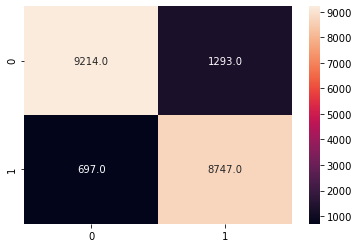

In [89]:
evaluate(Random_Regressor_model2)

# K-Nearest Neighbors Model

In [90]:
X=data[['age','gender','income','reward','offers','duration','total_amount']]
y=data['offer_successful']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict= knn.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.8603578767981555


              precision    recall  f1-score   support

           0       0.90      0.82      0.86     10507
           1       0.82      0.90      0.86      9444

    accuracy                           0.86     19951
   macro avg       0.86      0.86      0.86     19951
weighted avg       0.86      0.86      0.86     19951



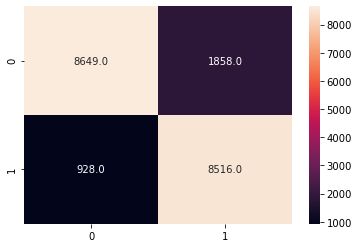

In [91]:
evaluate(knn)

# Logistic Regression Model

In [92]:
from sklearn.linear_model import LogisticRegressionCV
X=data[['age','gender','income','reward']]
y=data['offers']

### Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
Logistic_r = LogisticRegressionCV(random_state=10,cv=5)
Logistic_r.fit(X_train, y_train)
score = Logistic_r.score(X_train, y_train)
print("Model score Training of data", score) 

testing_score = Logistic_r.score(X_test, y_test)
print("Model score Testing data:", testing_score) 

Model score Training of data 0.8541138560687432
Model score Testing data: 0.8551451055084958


              precision    recall  f1-score   support

           1       0.81      0.83      0.82      7864
           2       1.00      1.00      1.00      4124
           3       0.83      0.81      0.82      7963

    accuracy                           0.86     19951
   macro avg       0.88      0.88      0.88     19951
weighted avg       0.86      0.86      0.86     19951



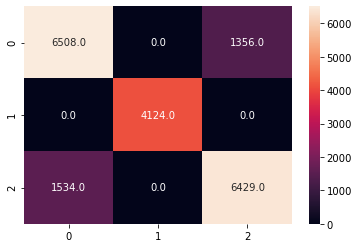

In [93]:
evaluate(Logistic_r)

# XGBoost Model

In [94]:
X=data[['age','gender','income','reward','offers','duration','total_amount']]
y=data['offer_successful']

xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)
print(accuracy_score(y_test, y_predict))

[10:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8949426093930128


              precision    recall  f1-score   support

           1       0.80      0.97      0.88      7864
           2       1.00      1.00      1.00      4124
           3       0.96      0.77      0.85      7963

    accuracy                           0.89     19951
   macro avg       0.92      0.91      0.91     19951
weighted avg       0.91      0.89      0.89     19951



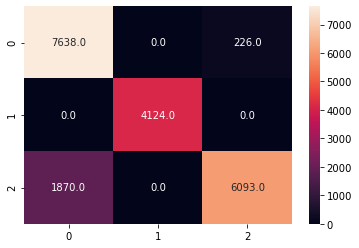

In [95]:
evaluate(xgb)